In [1]:
import pandas_datareader.data as web
 
import pandas as pd
 
import numpy as np
 
import datetime as dt
 
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import Series, DataFrame

import locale
locale.setlocale(locale.LC_ALL,'')





'English_United States.1252'

In [10]:
stocks = ['SPY', 'VBMFX']
data = web.get_data_yahoo(stocks, start=dt.datetime(1994, 1, 1), end=dt.datetime(2019, 12, 1))

data = data.drop(["High", "Low", "Open","Volume", "Adj Close"], axis=1)
data = data.resample('1M').mean()


data.tail(20)

Attributes       Close           
Symbols            SPY      VBMFX
Date                             
2018-05-31  270.070453  10.390909
2018-06-30  275.193335  10.407619
2018-07-31  278.872378  10.430476
2018-08-31  285.692611  10.439130
2018-09-30  290.141051  10.375263
2018-10-31  277.974782  10.283044
2018-11-30  272.207621  10.260000
2018-12-31  256.752104  10.382632
2019-01-31  260.104284  10.459047
2019-02-28  275.235265  10.518947
2019-03-31  280.030474  10.580000
2019-04-30  289.764762  10.634762
2019-05-31  285.302272  10.702273
2019-06-30  288.983499  10.870500
2019-07-31  298.963179  10.913182
2019-08-31  289.599089  11.135909
2019-09-30  298.100999  11.098000
2019-10-31  297.120868  11.104348
2019-11-30  310.286998  11.063000
2019-12-31  311.640015  11.060000

In [3]:
data_1M_Return = data.pct_change(1)
data_1M_Return= data_1M_Return.dropna()
data_1M_Return

Attributes     Close          
Symbols          SPY     VBMFX
Date                          
1994-02-28 -0.000583 -0.009448
1994-03-31 -0.016697 -0.024252
1994-04-30 -0.037474 -0.023555
1994-05-31  0.010328 -0.008868
1994-06-30  0.009002  0.003849
...              ...       ...
2019-08-31 -0.031322  0.020409
2019-09-30  0.029358 -0.003404
2019-10-31 -0.003288  0.000572
2019-11-30  0.044312 -0.003724
2019-12-31  0.004361 -0.000271

[311 rows x 2 columns]

In [4]:
data_1M_Return.describe()

Attributes       Close            
Symbols            SPY       VBMFX
count       311.000000  311.000000
mean          0.006716    0.000326
std           0.035295    0.008729
min          -0.206325   -0.028760
25%          -0.009852   -0.004228
50%           0.011076    0.001150
75%           0.028368    0.005926
max           0.117237    0.032088

In [5]:
data_12M_Return = data.pct_change(12)
data_12M_Return= data_12M_Return.dropna()
data_12M_Return

Attributes     Close          
Symbols          SPY     VBMFX
Date                          
1995-01-31 -0.015620 -0.090177
1995-02-28  0.023502 -0.067360
1995-03-31  0.063852 -0.033141
1995-04-30  0.137430 -0.002592
1995-05-31  0.163165  0.025858
...              ...       ...
2019-08-31  0.013674  0.066747
2019-09-30  0.027435  0.069660
2019-10-31  0.068877  0.079870
2019-11-30  0.139891  0.078265
2019-12-31  0.213778  0.065241

[300 rows x 2 columns]

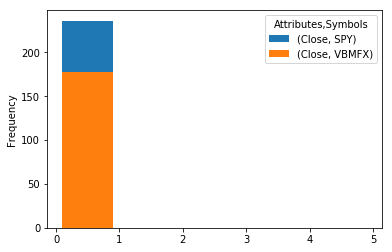

In [9]:
data_12M_Return.plot(kind='hist',bins=[0,1,2,3,4,5],rwidth=0.8)
plt.show()

In [ ]:
data_12M_Return.describe()

In [ ]:
pv = 10000
time_horizon = 30
i = 0.09
additions = 10000

for year in range(time_horizon):
    ending = pv * (1+i) + additions
    print(locale.currency(ending, grouping=True))
    pv = ending

In [ ]:
pv = 10000
expected_return = .09
volatility = .16
time_horizon = 30
annual_addition = 10000

print("\tReturn", "\t\tEnding Value".rjust(18))
for year in range(time_horizon):
    market_return = np.random.normal(expected_return, volatility)
    fv = pv * (1 + market_return) + annual_addition
    print("\t{}".ljust(10).format(round(market_return,4)), "\t{}".rjust(10).format(locale.currency(fv, grouping=True)))
    pv = fv


In [ ]:
sim = DataFrame()
iterations = 5000


for x in range(iterations):
    expected_return = .09
    volatility = .16
    time_horizon = 30
    pv = 1
    annual_investment = 1
    stream = []
    for i in range(time_horizon):
        end = round(pv * (1 + np.random.normal(expected_return,volatility)) + annual_investment,2)
        
        stream.append(end)

        pv = end

    
    sim[x] = stream

In [ ]:
first_twenty = list(range(20))
sim[first_twenty]

In [ ]:
plt.plot(sim[first_twenty])


In [ ]:
ending_values = sim.loc[29]
ending_values.describe()

In [ ]:
plt.hist(ending_values, bins=50)

In [ ]:
p_tiles = np.percentile(ending_values,[5,10,15,20,25,50, 75,80,85,90, 95])
for p in range(len(p_tiles)):
    l = [5,10,15,20,25,50, 75,80, 85,90,95]
    print( "{}%-ile: ".format(l[p]).rjust(15),"{}".format(locale.currency(p_tiles[p], grouping=True)))

In [ ]:
len(ending_values[ending_values>600000]) / len(ending_values)


In [ ]:
len(ending_values[(ending_values> 600000) & (ending_values< 1100000)]) /len(ending_values)
